In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.utils import resample

In [2]:
wine = pd.read_csv('data/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
for x in wine.columns:
    print(f"The percentage of empty cells in column {x} is {round(wine[x].isna().sum()/len(wine[x])*100,2)} %.")

The percentage of empty cells in column fixed acidity is 0.0 %.
The percentage of empty cells in column volatile acidity is 0.0 %.
The percentage of empty cells in column citric acid is 0.0 %.
The percentage of empty cells in column residual sugar is 0.0 %.
The percentage of empty cells in column chlorides is 0.0 %.
The percentage of empty cells in column free sulfur dioxide is 0.0 %.
The percentage of empty cells in column total sulfur dioxide is 0.0 %.
The percentage of empty cells in column density is 0.0 %.
The percentage of empty cells in column pH is 0.0 %.
The percentage of empty cells in column sulphates is 0.0 %.
The percentage of empty cells in column alcohol is 0.0 %.
The percentage of empty cells in column quality is 0.0 %.


In [4]:
wine['good_quality'] = wine['quality'].apply(lambda x: True if x >= 7 else False)

wine.drop(columns='quality', inplace=True)

In [5]:
features = wine.select_dtypes(include=['number'])
target = wine['good_quality'].astype(int)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

#### KNN

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
pred = knn.predict(X_test)

In [10]:
print("Accuracy:", accuracy_score(y_test, pred))
print("Precision:", precision_score(y_test, pred))
print("Recall:", recall_score(y_test, pred))

Accuracy: 0.85
Precision: 0.48484848484848486
Recall: 0.3404255319148936


#### Feature Engineering


In [12]:
normalizer = MinMaxScaler()

In [13]:
normalizer.fit(X_train)

MinMaxScaler()

In [14]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [15]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.362832,0.390411,0.31,0.143836,0.123539,0.328358,0.265018,0.743759,0.582677,0.226994,0.492308
1,0.132743,0.061644,0.40,0.034247,0.090150,0.589552,0.561837,0.082966,0.401575,0.134969,0.538462
2,0.557522,0.184932,0.47,0.061644,0.176962,0.074627,0.028269,0.596916,0.440945,0.233129,0.215385
3,0.371681,0.386986,0.26,0.047945,0.126878,0.223881,0.060071,0.504405,0.456693,0.061350,0.153846
4,0.336283,0.626712,0.15,0.349315,0.101836,0.149254,0.169611,0.655653,0.496063,0.073620,0.230769


In [16]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.274336,0.301370,0.08,0.109589,0.170284,0.194030,0.141343,0.516153,0.393701,0.177914,0.184615
1,0.283186,0.260274,0.17,0.047945,0.116861,0.298507,0.339223,0.435389,0.511811,0.067485,0.169231
2,0.539823,0.376712,0.22,0.123288,0.158598,0.238806,0.098940,0.758443,0.425197,0.374233,0.230769
3,0.345133,0.232877,0.31,0.092466,0.110184,0.462687,0.183746,0.582232,0.464567,0.104294,0.215385
4,0.185841,0.232877,0.24,0.054795,0.108514,0.253731,0.098940,0.347283,0.511811,0.141104,0.338462


In [17]:
knn.score(X_test_norm, y_test)

0.853125

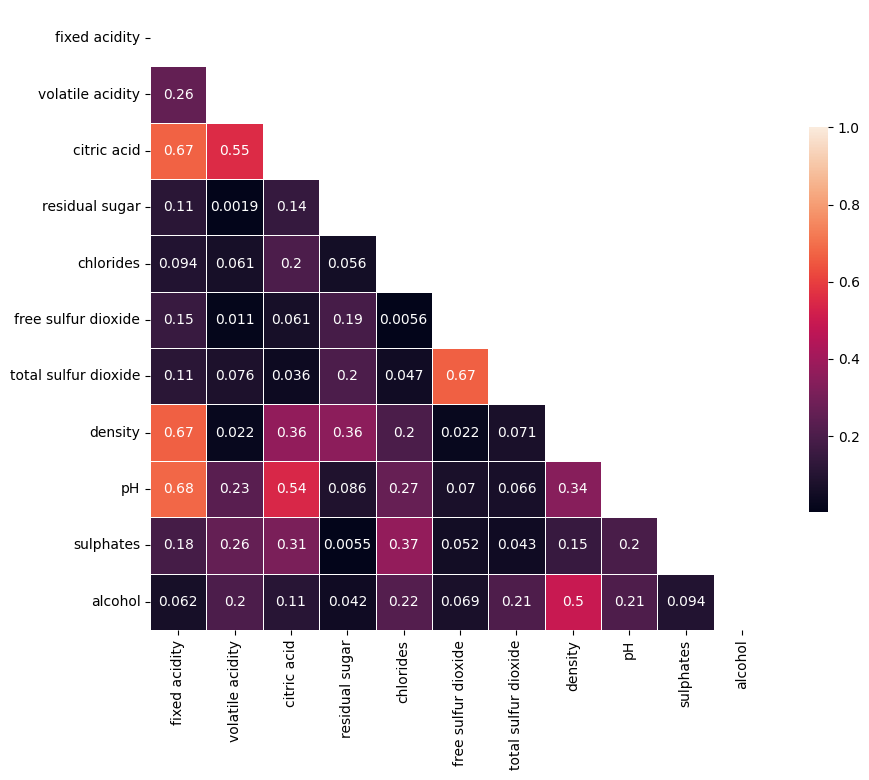

In [18]:
corr=np.abs(wine.drop(columns = ["good_quality"]).corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [19]:
X_train_reduced = X_train_norm.drop(columns = ["free sulfur dioxide"])
X_test_reduced = X_test_norm.drop(columns = ["free sulfur dioxide"])

In [20]:
knn.fit(X_train_reduced, y_train)
knn.score(X_test_reduced, y_test)

0.8875

#### Logistic Regression

In [22]:
from sklearn.preprocessing import StandardScaler
wine.columns
numerical_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

scaler = StandardScaler()
wine[numerical_features] = scaler.fit_transform(wine[numerical_features])

In [23]:
features = wine.drop(columns='good_quality')
target = wine['good_quality'].astype(int)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [25]:
log_reg = LogisticRegression()

In [26]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [27]:
log_pred = log_reg.predict(X_test)

In [28]:
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Precision:", precision_score(y_test, log_pred))
print("Recall:", recall_score(y_test, log_pred))

Accuracy: 0.865625
Precision: 0.5909090909090909
Recall: 0.2765957446808511


In [29]:
log_reg.coef_

array([[ 0.44563646, -0.4865759 ,  0.07077434,  0.30520086, -0.31425923,
         0.12380692, -0.5966366 , -0.44947092,  0.03571465,  0.56377623,
         0.81856476]])

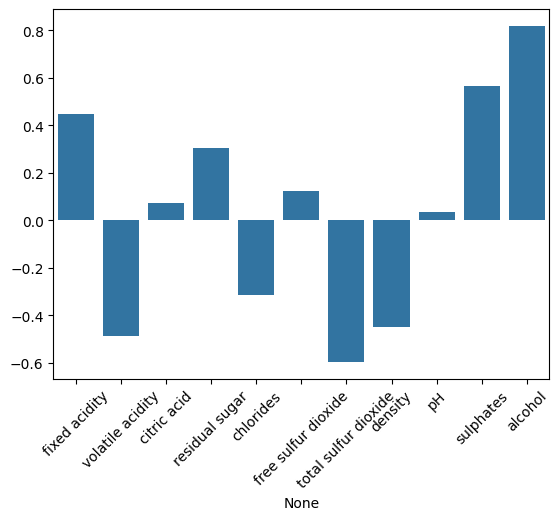

In [158]:
sns.barplot(x=X_train.columns, y=log_reg.coef_[0])
plt.xticks(rotation=45)
plt.savefig('data/coefficiency_barplot.png')

#### Decision Tree

In [32]:
tree = DecisionTreeClassifier(max_depth=5)

In [33]:
tree.fit(X_train_norm, y_train)

DecisionTreeClassifier(max_depth=5)

In [34]:
tree_pred = tree.predict(X_test_norm)

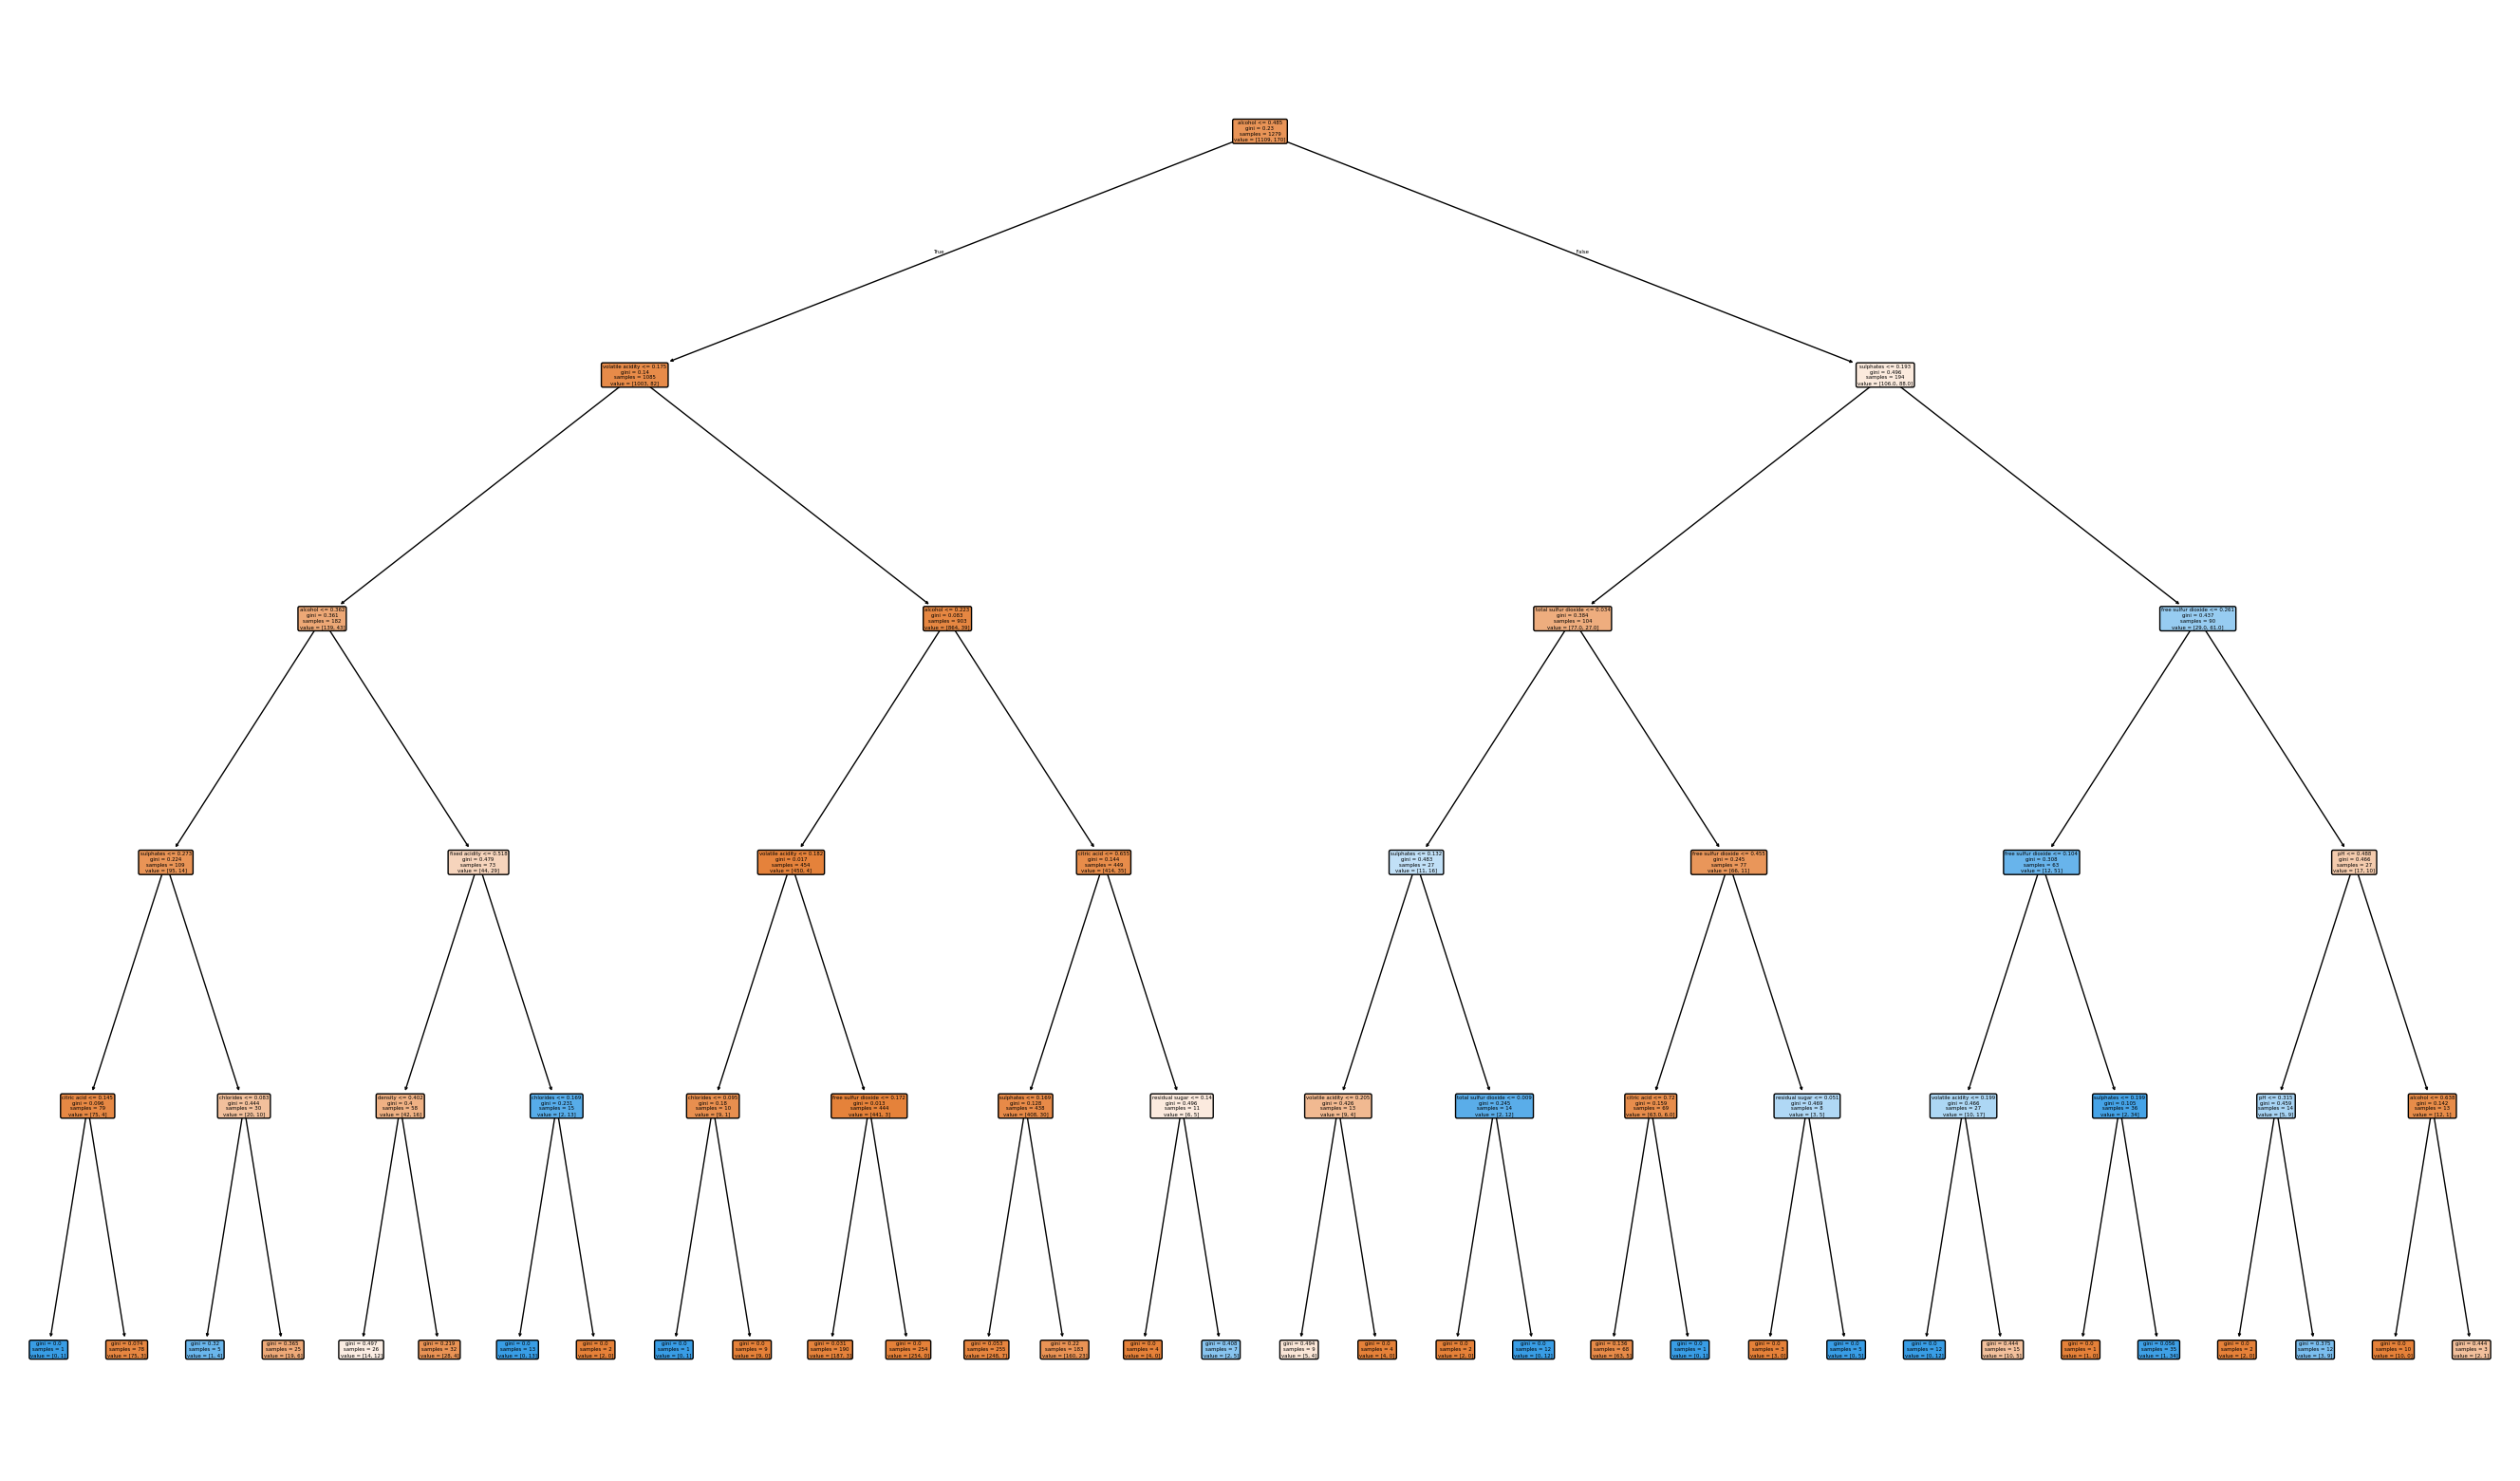

In [35]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))
plot_tree(tree,filled = True, rounded=True,feature_names=list(X_train.columns))
plt.show()

In [36]:
print("Accuracy:", accuracy_score(y_test, tree_pred))
print("Precision:", precision_score(y_test, tree_pred))
print("Recall:", recall_score(y_test, tree_pred))

Accuracy: 0.875
Precision: 0.6296296296296297
Recall: 0.3617021276595745


#### Bagging

In [38]:
bagging_class = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)

In [39]:
bagging_class.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                  max_samples=1000, n_estimators=100)

In [40]:
bag_pred = bagging_class.predict(X_test)

In [41]:
print("Accuracy:", accuracy_score(y_test, bag_pred))
print("Precision:", precision_score(y_test, bag_pred))
print("Recall:", recall_score(y_test, bag_pred))

Accuracy: 0.890625
Precision: 0.6578947368421053
Recall: 0.5319148936170213


#### Random Forest

In [43]:
forest_class = RandomForestClassifier(n_estimators=100,
                             max_depth=10, random_state=42)

In [44]:
forest_class.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [45]:
forest_pred = forest_class.predict(X_test)

In [46]:
print("Accuracy:", accuracy_score(y_test, forest_pred))
print("Precision:", precision_score(y_test, forest_pred))
print("Recall:", recall_score(y_test, forest_pred))

Accuracy: 0.909375
Precision: 0.75
Recall: 0.574468085106383


#### Gradient Boosting

In [48]:
gb_class = GradientBoostingClassifier(max_depth=20,
                                   n_estimators=100)

In [49]:
gb_class.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=20)

In [50]:
gb_pred = gb_class.predict(X_test)

In [51]:
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("Precision:", precision_score(y_test, gb_pred))
print("Recall:", recall_score(y_test, gb_pred))

Accuracy: 0.88125
Precision: 0.6046511627906976
Recall: 0.5531914893617021


#### Ada Boosting

In [53]:
ada_class = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),
                            n_estimators=100)

In [54]:
ada_class.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                   n_estimators=100)

In [55]:
ada_pred = ada_class.predict(X_test)

In [56]:
print("Accuracy:", accuracy_score(y_test, ada_pred))
print("Precision:", precision_score(y_test, ada_pred))
print("Recall:", recall_score(y_test, ada_pred))

Accuracy: 0.89375
Precision: 0.6444444444444445
Recall: 0.6170212765957447


#### Confusion Matrix

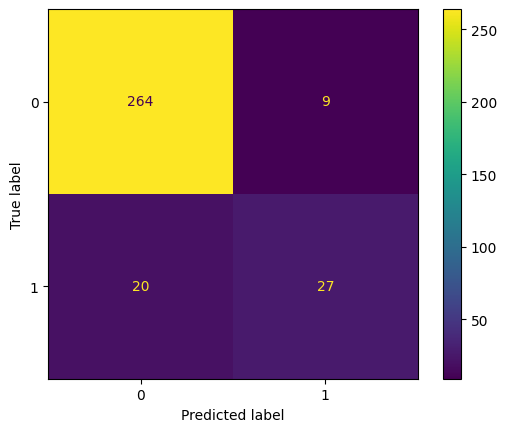

In [58]:
cm_train = confusion_matrix(y_test, forest_pred)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()
plt.savefig('data/confusion_matrix.png')
# I predicted to be x axis, but is actually y axis

## Handling Imbalances


#### Oversampling


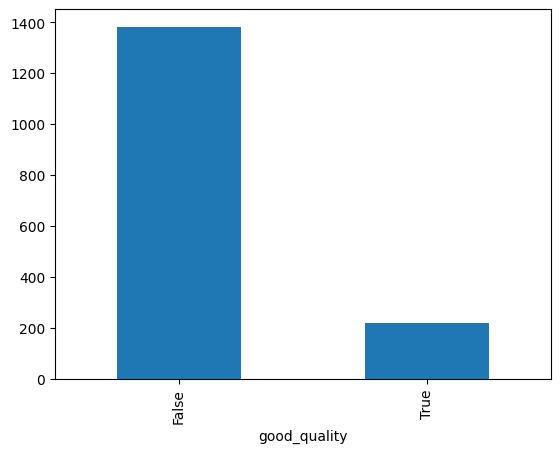

In [61]:
wine_quality = wine["good_quality"].value_counts()
wine_quality.plot(kind="bar")
plt.show()

In [62]:
good_wine = wine[wine['good_quality'] == True]
bad_wine = wine[wine['good_quality'] == False]

In [63]:
good_wine_oversampled = resample(good_wine, 
                                    replace=True, 
                                    n_samples = len(bad_wine),
                                    random_state=0)

In [64]:
train_over = pd.concat([good_wine_oversampled, bad_wine])
train_over

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good_quality
1133,-0.643266,-0.267148,-1.032019,2.100902,0.032592,-0.561823,-0.865676,0.049461,0.381544,0.128950,0.729364,True
440,2.459199,-1.216849,2.305761,-0.240375,-0.328722,-0.944346,-0.531178,1.035287,-2.793302,0.955133,-0.584777,True
948,0.333436,-2.278280,0.919299,-0.524166,-0.264960,-0.561823,-0.774449,-0.650157,0.640715,0.601055,1.386435,True
1279,0.850513,-1.272714,0.611196,-0.595114,-0.541259,-1.231239,-1.139357,-1.031767,-1.108690,-0.520193,1.010966,True
513,1.252685,-0.099554,1.894957,-0.098479,0.415159,-0.944346,-0.956903,0.293268,-1.432654,0.010924,1.292568,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,False
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,False
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,False
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,False


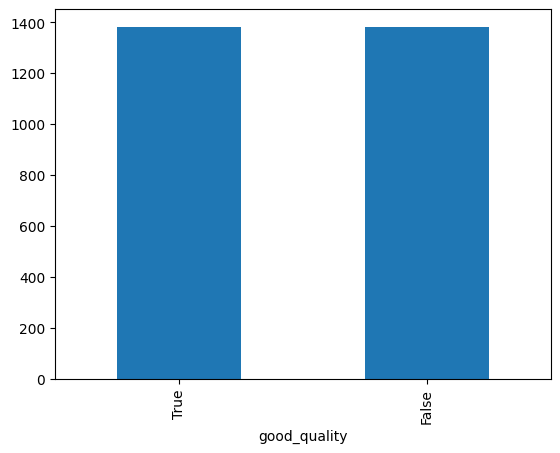

In [65]:
wine_plt = train_over["good_quality"].value_counts()
wine_plt.plot(kind="bar")
plt.show()

In [66]:
X_train_over = train_over.drop(columns = ["good_quality"])
y_train_over = train_over["good_quality"]
X_train_over

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1133,-0.643266,-0.267148,-1.032019,2.100902,0.032592,-0.561823,-0.865676,0.049461,0.381544,0.128950,0.729364
440,2.459199,-1.216849,2.305761,-0.240375,-0.328722,-0.944346,-0.531178,1.035287,-2.793302,0.955133,-0.584777
948,0.333436,-2.278280,0.919299,-0.524166,-0.264960,-0.561823,-0.774449,-0.650157,0.640715,0.601055,1.386435
1279,0.850513,-1.272714,0.611196,-0.595114,-0.541259,-1.231239,-1.139357,-1.031767,-1.108690,-0.520193,1.010966
513,1.252685,-0.099554,1.894957,-0.098479,0.415159,-0.944346,-0.956903,0.293268,-1.432654,0.010924,1.292568
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [67]:
forest_good_oversampled = RandomForestClassifier()
forest_good_oversampled.fit(X_train_over, y_train_over)

RandomForestClassifier()

In [68]:
forest_good_oversampled.score(X_test, y_test)

1.0

In [69]:
y_pred = forest_good_oversampled.predict(X_test)

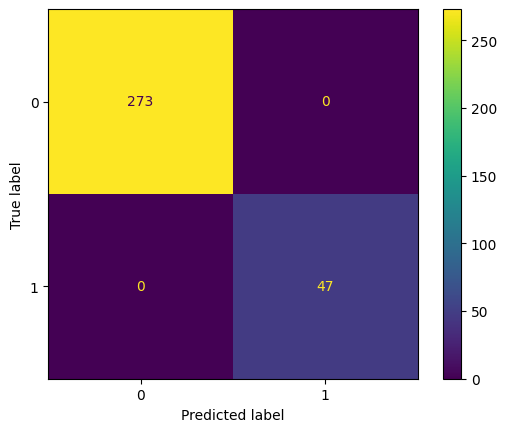

In [70]:
cm_train_over = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm_train_over)
disp.plot()

In [71]:
pred = forest_good_oversampled.predict(X_test)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       1.00      1.00      1.00        47

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



#### Undersampling

In [73]:
bad_wine_undersampled = resample(bad_wine, 
                                    replace=True, 
                                    n_samples = len(good_wine),
                                    random_state=0)

In [74]:
train_under = pd.concat([bad_wine_undersampled, good_wine])
train_under

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good_quality
764,0.448342,0.850147,-0.826617,0.185312,0.117607,-0.466193,-0.075043,1.130689,-0.007213,-0.638220,-0.866379,False
635,0.218530,1.743983,-1.391472,-0.807957,-0.477498,0.777007,-0.409542,-0.713758,-0.266384,-0.638220,-0.678644,False
1414,0.965420,-1.160984,1.638205,-0.240375,-0.222453,-1.231239,-0.956903,1.406296,-0.719933,0.719081,-0.772512,False
959,-0.183641,0.347364,-1.134720,-0.382271,0.032592,-0.370562,-0.439951,0.319768,0.316751,-0.284141,-0.397043,False
856,0.563248,-0.937525,0.611196,-0.737010,-0.158692,2.402731,0.259456,-0.120143,1.029472,0.424016,0.447763,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,-0.528360,-1.552038,0.097691,-0.240375,-0.711289,0.298854,0.077002,-0.045941,0.575922,0.601055,0.447763,True
1544,0.046171,-0.881661,0.816598,-0.169427,-0.520005,-0.370562,-0.835267,-0.660757,-0.914312,0.896120,0.729364,True
1549,-0.528360,-0.937525,0.149042,-0.524166,-0.286214,0.107592,-0.683222,-1.355075,-0.460762,0.246977,0.917099,True
1555,-0.758172,0.179770,-0.518514,-0.595114,-0.477498,-0.083669,-0.683222,-0.851562,0.835093,0.128950,0.119227,True


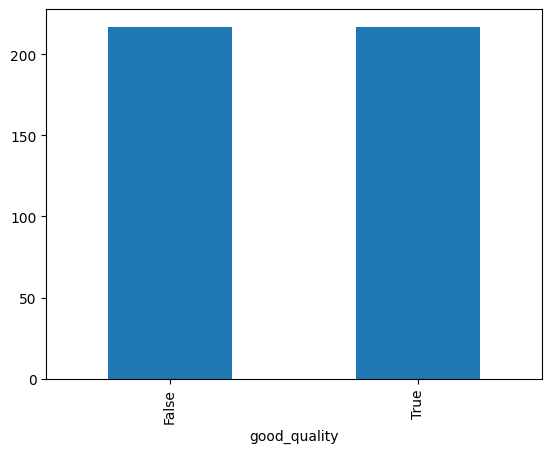

In [75]:
wine_plt = train_under["good_quality"].value_counts()
wine_plt.plot(kind="bar")
plt.show()

In [76]:
X_train_under = train_under.drop(columns = ["good_quality"])
y_train_under = train_under["good_quality"]

In [77]:
forest_bad_undersampled = RandomForestClassifier()
forest_bad_undersampled.fit(X_train_under, y_train_under)

RandomForestClassifier()

In [78]:
forest_bad_undersampled.score(X_test, y_test)

0.83125

In [79]:
pred = forest_bad_undersampled.predict(X_test)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       273
           1       0.47      1.00      0.64        47

    accuracy                           0.83       320
   macro avg       0.73      0.90      0.76       320
weighted avg       0.92      0.83      0.85       320



#### SMOTE

In [81]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [82]:
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [83]:
forest_smote = RandomForestClassifier()
forest_smote.fit(X_train_sm, y_train_sm)

RandomForestClassifier()

In [84]:
forest_smote.score(X_test, y_test)

0.90625

In [85]:
pred = forest_smote.predict(X_test)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       273
           1       0.67      0.72      0.69        47

    accuracy                           0.91       320
   macro avg       0.81      0.83      0.82       320
weighted avg       0.91      0.91      0.91       320

